# Score to Win

It is a exploratory project which analyses relationship between average scores of players and number of games won by coaches. 

The dataset used in this projects was provided by the library of Istanbul Sehir University.

In [1]:
import pandas as pd

data_players = pd.read_csv("data/basketball_players.csv", low_memory=False)
data_players.head()

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note
0,abramjo01,1946,1,PIT,NBA,47,0,0,527,0,...,0,0,0,0,0,0,0,0,0,NaN
1,aubucch01,1946,1,DTF,NBA,30,0,0,65,0,...,0,0,0,0,0,0,0,0,0,NaN
2,bakerno01,1946,1,CHS,NBA,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,baltihe01,1946,1,STB,NBA,58,0,0,138,0,...,0,0,3,10,2,1,0,0,0,NaN
4,barrjo01,1946,1,STB,NBA,58,0,0,295,0,...,0,0,0,0,0,0,0,0,0,NaN


In [2]:
data_coaches = pd.read_csv("data/basketball_coaches.csv")
data_coaches.head()

,coachID,year,tmID,lgID,stint,won,lost,post_wins,post_losses
0,johnsne01,1961,PGR,ABL1,1,41.0,40.0,0.0,1.0
1,auerbre01,1946,WSC,NBA,1,49.0,11.0,2.0,4.0
2,birchpa01,1946,PIT,NBA,1,15.0,45.0,0.0,0.0
3,cliffro01,1946,CLR,NBA,2,13.0,10.0,1.0,2.0
4,cohalne01,1946,NYK,NBA,1,33.0,27.0,2.0,3.0


Some of the columns, such as stint and lgID, are not needed in this project to achieve the aim. Therefore, I eliminate them by selecting the ones needed.

In [3]:
data_players = data_players[["playerID", "year", "tmID", "points"]]
data_players.head()

,playerID,year,tmID,points
0,abramjo01,1946,PIT,527
1,aubucch01,1946,DTF,65
2,bakerno01,1946,CHS,0
3,baltihe01,1946,STB,138
4,barrjo01,1946,STB,295


In [4]:
data_coaches = data_coaches[["coachID", "year", "tmID", "won"]]
data_coaches.head()

,coachID,year,tmID,won
0,johnsne01,1961,PGR,41.0
1,auerbre01,1946,WSC,49.0
2,birchpa01,1946,PIT,15.0
3,cliffro01,1946,CLR,13.0
4,cohalne01,1946,NYK,33.0


Then, I group the selected data of NBA players by year and team ID for being able to find the average scores of teams per year. 

In [5]:
data_points = data_players.groupby(["year", "tmID"]).agg({"points": "mean"})
data_points.head()

year tmID     points
year tmID                      
1937 AFS   1937  AFS  61.909091
     AGW   1937  AGW  53.750000
     BFB   1937  BFB  26.200000
     CNC   1937  CNC  20.153846
     COL   1937  COL  20.142857

Here is the final sizes of both data as row and column numbers respectively:

In [6]:
data_coaches.shape

(1689, 4)

In [7]:
data_points.shape

(1536, 3)

Furthermore, information on columns for number of games won and average scores of teams can be seen below:

In [8]:
data_coaches.describe()["won"]

count    1680.000000
mean       33.298214
std        17.011148
min         0.000000
25%        20.000000
50%        36.000000
75%        46.000000
max        72.000000
Name: won, dtype: float64

In [9]:
data_points.describe()["points"]

count    1536.000000
mean      502.991128
std       173.386425
min        13.444444
25%       430.675641
50%       521.385417
75%       614.946429
max       922.090909
Name: points, dtype: float64

In order to understand the data better, there are some visualizations below.

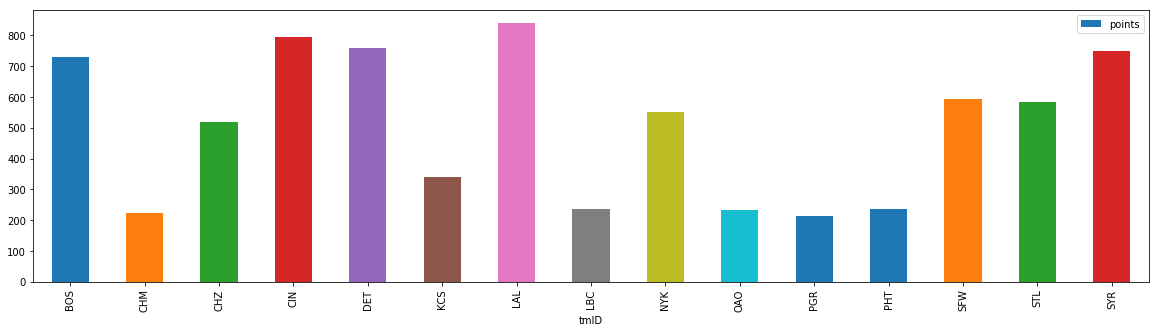

In [10]:
import matplotlib as plt

# Bar plot illustrating all teams and average scores of their players in 1962
data_points[data_points.year == 1962].plot(kind="bar", x="tmID", y="points")

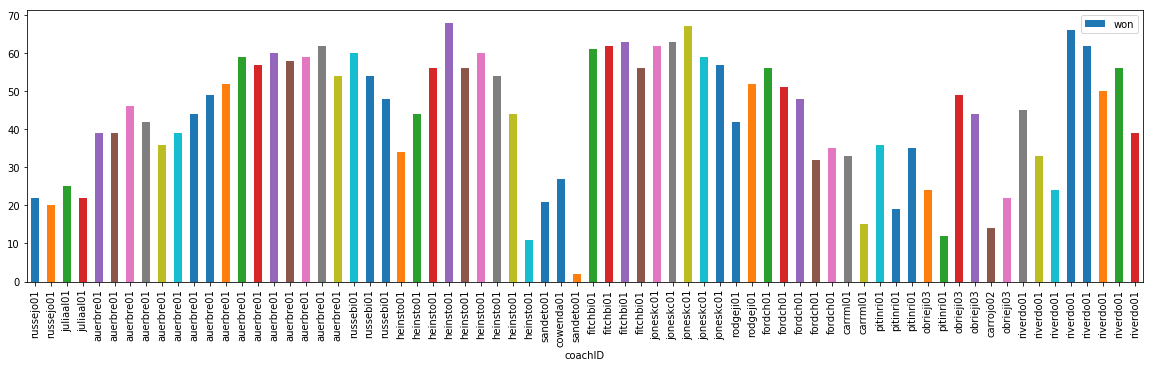

In [8]:
# Bar plot illustrating all coaches of Boston Celtics and number of games won by each of them
plt.rcParams["figure.figsize"] = (20,5)
data_coaches[data_coaches.tmID == "BOS"].plot(kind="bar", x="coachID", y="won")

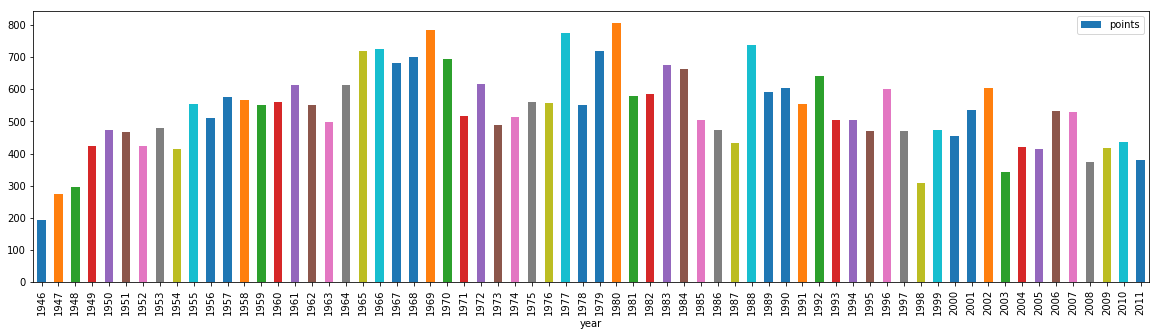

In [9]:
# Bar plot illustrating average scores of New York Knicks players per year
data_points[data_points.tmID == "NYK"].plot(kind="bar", x="year", y="points")

Beside those plots, histogram of number of games won by coaches is shown below with the aim of illustrating frequencies.

No handles with labels found to put in legend.


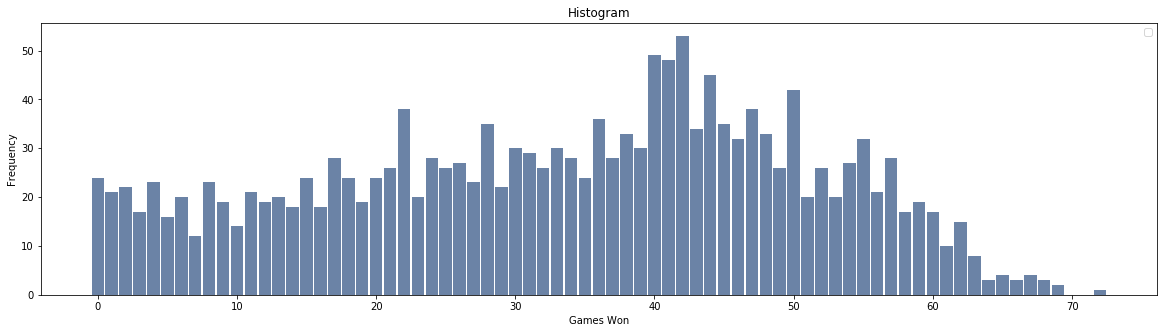

In [13]:
import lib.thinkstats2, lib.thinkplot

hist_coaches = lib.thinkstats2.Hist(data_coaches.won)
lib.thinkplot.Hist(hist_coaches)
lib.thinkplot.Config(title="Histogram", xlabel="Games Won", ylabel="Frequency")

PMF (probability mass function) and CDF (cumulative distribution function) of average scores of players are shown below as well, it seems that the density of the data is greater between the interval of 400 to 600.

No handles with labels found to put in legend.


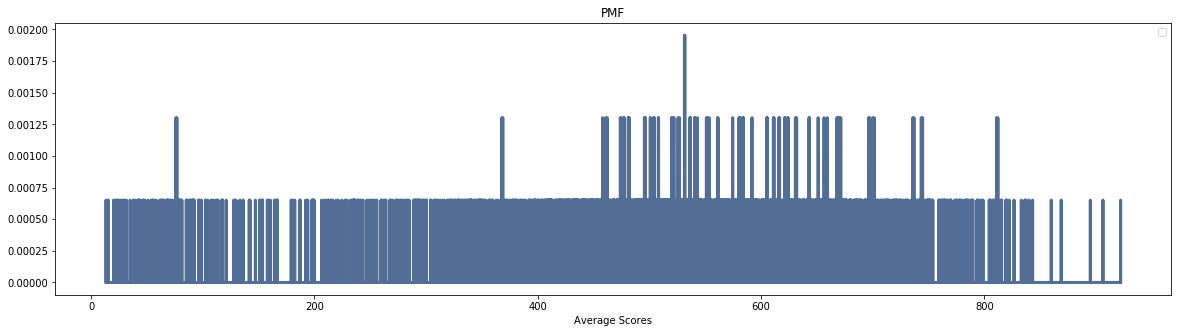

In [17]:
pmf_points = lib.thinkstats2.Pmf(data_points.points)
lib.thinkplot.Pmf(pmf_points)
lib.thinkplot.Config(title="PMF", xlabel="Average Scores")

No handles with labels found to put in legend.


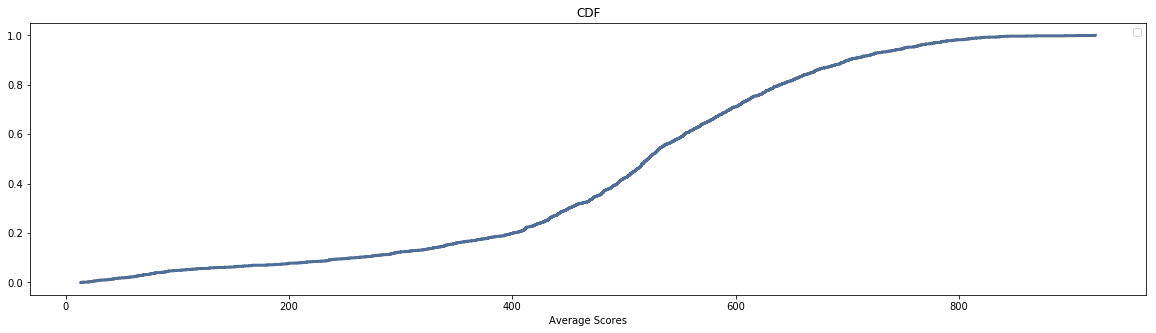

In [16]:
cdf_points = lib.thinkstats2.Cdf(data_points.points)
lib.thinkplot.Cdf(cdf_points)
lib.thinkplot.Config(title="CDF", xlabel="Average Scores")

I merge those datasets into a single one on multiple columns by using the inner method for being able to analyse the relationship.

In [7]:
data_merged = pd.merge(data_coaches, data_points, how="inner", left_on=["year", "tmID"], right_on=["year", "tmID"])
data_merged.head()

,coachID,year,tmID,won,points
0,johnsne01,1961,PGR,41.0,434.400000
1,auerbre01,1946,WSC,49.0,316.285714
2,birchpa01,1946,PIT,15.0,216.117647
3,cliffro01,1946,CLR,13.0,236.166667
4,dehnere01,1946,CLR,17.0,236.166667


In [25]:
data_merged.shape

(1689, 5)

After merging the data, I apply a regression method called least squares in order to measure the goodness of fit.

In [11]:
import statsmodels.formula.api as smf

formula = "won ~ points" # Number of games won as dependent, average scores as explanatory variable
model = smf.ols(formula, data=data_merged)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    won   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     377.0
Date:                Sat, 09 Jun 2018   Prob (F-statistic):           6.35e-76
Time:                        00:51:12   Log-Likelihood:                -6974.0
No. Observations:                1680   AIC:                         1.395e+04
Df Residuals:                    1678   BIC:                         1.396e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2636      1.442      4.344      0.000       3.435       9.092
points         0.0515      0.003     19.417      0.000       0.046       0.057
==============================================================================
Omnibus:                       49.420   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.838
Skew:                          -0.307   Prob(JB):                     1.36e-09
Kurtosis:                       2.547   Cond. No.                     2.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As is seen, R-squared is around 18% while P-value (P>|t|) seems to be either zero or too close to zero.

Thereby, it is possible to say that average scores of players make 18% variance in number of games won. Plus, P-value is smaller than the traditional threshold (5%) which indicates that the effect of average scores is statistically significant, unlikely to occur by chance in other words.

The regression line fits the data reasonably well.

In [12]:
cols = data_merged[["won", "points"]]
corr = cols.corr()
corr

,won,points
won,1.00000,0.42833
points,0.42833,1.00000


How about the correlation of number of games won and average scores of teams? 

According to the table above, they move in tandem sicne their correlation is between 0 and 1.

To sum up, my hypothesis reaches the conclusion of that average scores of players positively relates to number of games won by coaches.